# Introduction to TensorFlow

TensorFlow is a powerful open source software library for numerical computation,
particularly well suited and fine-tuned for large-scale Machine Learning. Its basic
principle is simple: you first define in Python a graph of computations to perform,
and then TensorFlow takes that graph and runs it efficiently using optimized C++ code.

![](img/fig9.png)

![](img/fig10.png)

### Some installation notes
* For GPU support, you need to install tensorflow-gpu instead of tensorflow.
* Use `conda` instead of `pip` (See [this](https://towardsdatascience.com/stop-installing-tensorflow-using-pip-for-performance-sake-5854f9d9eb0c) benchmark)
* Use python 3.6 (for the moment, avoid python 3.7)
* Check tensorflow version
* Source installation, not so friendly

In [1]:
import tensorflow as tf
tf.__version__

'1.9.0'

### Parameters
* The `variable`'s have a fixed size, they contain the parameters of a model, which can then be saved or restored.

* The `variable`'s can have a constant value, but they are usually initialized with some random or determined value, and their content varies during the optimization process.

![](img/fig9.png)

In [2]:
x = tf.Variable(3, name="x")
y = tf.Variable(4, name="y")
f = x*x*y + y + 2
print(x)
print(y)
print(f)

<tf.Variable 'x:0' shape=() dtype=int32_ref>
<tf.Variable 'y:0' shape=() dtype=int32_ref>
Tensor("add_1:0", shape=(), dtype=int32)


In [3]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter("tmp", sess.graph)

In [4]:
!tensorboard --logdir tmp

W1206 00:16:09.833578 Reloader tf_logging.py:120] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
TensorBoard 1.9.0 at http://santiago-HP:6006 (Press CTRL+C to quit)
^C


In [5]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

print(result)

42


In [8]:
# Jupyter notebook trick
tf.reset_default_graph()

## Lifecycle of a Node Value
When you evaluate a node, TensorFlow automatically determines the set of nodes
that it depends on and it evaluates these nodes first.

In [9]:
w = tf.constant(3)
x = w + 2
y = x + 5
z = x * 3

In [15]:
%%time
with tf.Session() as sess:
    print(y.eval())
    print(z.eval())

10
15
CPU times: user 8.28 ms, sys: 3.42 ms, total: 11.7 ms
Wall time: 10.1 ms


In [16]:
%%time
with tf.Session() as sess:
    y_val, z_val = sess.run([y, z])
    print(y_val)
    print(z_val)

10
15
CPU times: user 7.86 ms, sys: 0 ns, total: 7.86 ms
Wall time: 6.63 ms


### Linear Regression with TensorFlow

#### Linear Regression
$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n $$
where
* $\hat{y}$ is the predicted value
* $n$ is the number of features
* $x_i$ is the i$^\text{th}$ feature
* $x_j$ is the j$^\text{th}$ model parameter

$$\hat{y} = h_\theta(x) = \theta^T \cdot \textbf{x} $$
#### Optimize
**The Normal Equation** 
$$\hat\theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y$$

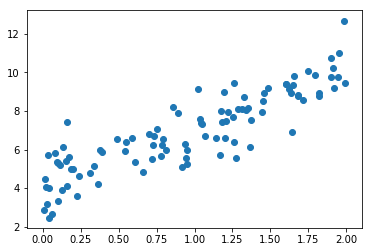

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

m = 100

X = 2 * np.random.rand(m, 1)
Y = 4 + 3 * X + np.random.randn(m, 1)

plt.scatter(X,Y)

X_b = np.c_[np.ones((100, 1)), X]

In [20]:
tf.reset_default_graph()

In [26]:
x = tf.constant(X_b, dtype=tf.float32, name='X')
y = tf.constant(Y, dtype=tf.float32, name='y')
xt = tf.transpose(x)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(xt, x)), xt), y)

In [27]:
print(x)
print(theta)

Tensor("X_2:0", shape=(100, 2), dtype=float32)
Tensor("MatMul_5:0", shape=(2, 1), dtype=float32)


In [28]:
with tf.Session() as sess:
    theta_value = theta.eval()
theta_value

array([[4.1393757],
       [2.9308658]], dtype=float32)

Just like Numpy, more code, great GPU support

## Gradient

In [29]:
tf.reset_default_graph()
x = tf.Variable(initial_value=tf.random_normal([1]), name="x", dtype=tf.float32)
y = tf.Variable(initial_value=tf.random_normal([1]), name="y", dtype=tf.float32)
f = x**2+y**2
f

<tf.Tensor 'add:0' shape=(1,) dtype=float32>

In [30]:
dx = tf.gradients(f, x)
dy = tf.gradients(f, y)

In [31]:
val_x, val_y = 5, 2
with tf.Session() as sess:
    val_f, val_dx, val_dy = sess.run([f, dx, dy], feed_dict={x: [val_x], y:[val_y]})
print(" f(%d,%d) = %d"%(val_x, val_y, val_f))
print("dx(%d,%d) = %d"%(val_x, val_y, val_dx[0]))
print("dy(%d,%d) = %d"%(val_x, val_y, val_dy[0]))

 f(5,2) = 29
dx(5,2) = 10
dy(5,2) = 4


In [46]:
from sympy import symbols, diff, evalf

x, y = symbols('x y')
f = x**2 + y**2
dx = diff(f, x)
dy = diff(f, y)
print(f,'\t', dx,'\t', dy)
print(" f(%d,%d) = %d"%(val_x, val_y, f.evalf(subs={x:val_x, y:val_y})))
print("dx(%d,%d) = %d"%(val_x, val_y, dx.evalf(subs={x:val_x, y:val_y})))
print("dy(%d,%d) = %d"%(val_x, val_y, dy.evalf(subs={x:val_x, y:val_y})))

x**2 + y**2 	 2*x 	 2*y
 f(5,2) = 29
dx(5,2) = 10
dy(5,2) = 4


So TensorFlow computes the gradients for you. But it gets even easier: it also provides
a number of optimizers out of the box, including a Gradient Descent optimizer.

## Feeding Data to the Training Algorithm

### Data
* The `placeholder`'s can be matrices (tensors) with a fixed number of columns, but variable rows, in order to evaluate expressions with different datasets.

* The `placeholder`'s do not have initial values, and you have to feed them directly with the data

In [47]:
tf.reset_default_graph()
A = tf.placeholder(tf.float32, shape=(None, 3))
B = A + 5

with tf.Session() as sess:
    B_val_1 = B.eval(feed_dict={A: [[1, 2, 3]]})
    B_val_2 = B.eval(feed_dict={A: [[4, 5, 6], [7, 8, 9]]})
    
print(B_val_1)
print(B_val_2)

[[6. 7. 8.]]
[[ 9. 10. 11.]
 [12. 13. 14.]]


## Logistic Regression with TensorFlow

## Saving and Restoring Models

## Neural Network Example

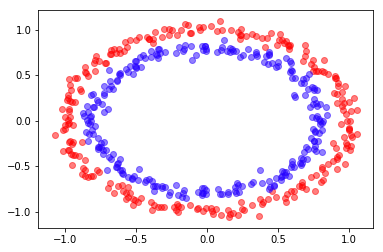

In [53]:
import Utils.mlutils as mlutils
from sklearn.datasets import make_circles
X, y = make_circles(500, noise=0.04)
mlutils.plot_2Ddata(X, y)

# Keras